# Election candidates

For this study we'll use the dataset of election candidates, focusing more precisely on ID numbers. South African ID numbers are 13 digits long:

* 1-6 are birthdate in YYMMDD format.
* 7-10 are gender where female < 5000 < male.
* 11 is country: 0 for SA, 1 for other.
* 12 used to be a racial identifier, doesn't means anything anymore.
* 13 is a check bit, verifies the integrity of the number.

## Initial set up

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import functools as f

Some functional stuff because

In [2]:
def compose(*functions):
    return f.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

## Setting up the dataset

In [3]:
df = pd.read_csv("Electoral_Candidates_2016.csv")

In [4]:
df

,Province,Municipality,Party,PR List OrderNo / Ward No,IDNumber,Fullname,Surname
0,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,1,6305015834085,LUKE MONWABISI,QUSE
1,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,2,7106220790081,MANDISA EUNICE,MALANGE
2,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,3,7002076140085,LUDUMO,KWESABA
3,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,4,7702286172089,OXFORD MAFU BENEVOLENT,KWESABA
4,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,5,7905075498082,MZWAKHE DARLINGTON,LUHADI
5,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,6,6003015050089,CHARLES FIELD,BALLANTYNE
6,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,7,6309245922082,SABULELA TEMPLETON,SIHOYIYA
7,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,8,7403300701082,NOLITA,MPAFA
8,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,9,8911036095081,SIBONGISENI,MAKELENI
9,Eastern Cape,BUF - Buffalo City,AFRICAN CHRISTIAN DEMOCRATIC PARTY,10,8611080481084,UNATHI,PONOSHE


## Decomposing the ID: Year of birth

In [5]:
IDs = df['IDNumber']

In [6]:
raw_birthDates = IDs.apply(lambda x: x[0:6])

In [7]:
short_years = raw_birthDates.apply(lambda x: x[0:2])

In [8]:
# TODO: dynamically determine the bound
def full_year(yy):
    if int(yy) < 17:
        return "20" + yy
    else:
        return "19" + yy

In [9]:
years = short_years.apply(full_year)

Now we can look into plotting this!

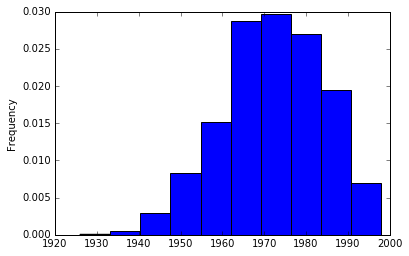

In [10]:
pd.to_numeric(years).plot.hist(normed=True)

Now, this is a lot of candidates – we need to check for/clean duplicates!

In [11]:
CURRENT_YEAR = 2016
def age(year):
    return str(CURRENT_YEAR - int(year))

In [12]:
age(1992)

'24'

In [13]:
ages = years.apply(age)

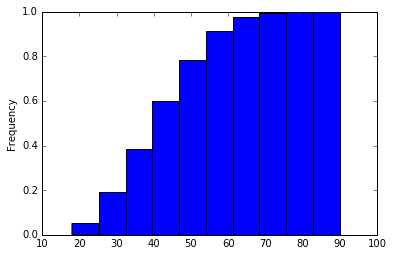

In [14]:
pd.to_numeric(ages).plot.hist(cumulative=True, normed=True)

In [15]:
ages_n = pd.to_numeric(ages)

In [16]:
ages_n.quantile(q=0.5)

43.0

In [17]:
ages_n.max()

90

In [18]:
ages_n.min()

18